# DBSCAN Algorithm 
Density-Based Spatial Clustering of Applications with Noise. <br><br>

In this notebook we're trying DBSCAN on MinMax Scaled data and on Standard Scaled data.<br>

## Steps: 
- Reading data
- Visiualizing data on different number of components
- Hyperparameter tuning
- Evaluation
- Choosing the best model.

## Methods:
- Dimensionality Reduction method: PCA. 
- Hyperparameters: Eps, MinPts. 
- Hyperparameters tuning method: combination of different values for eps and minPts determined using the K-distance graph. 
- Evaluation metric: Sillhouettee score.

In [1]:
# libraries
import pandas as pd
import numpy as np
import sys

# modelling - dbscan
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score

# dimensionality reduction 
from sklearn.decomposition import PCA

# visulaization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook

# Calling functions 
sys.path.insert(0, '../src/utils/')
import dbscan
import EDA

## Reading MinMax Scaled Data

In [2]:
# Reading data 
minmax_data = pd.read_csv('../data/processed/data_scaled_minmax.csv')

# Print the shape of data
minmax_data.shape

(3346, 231)

### Visiualizing the data 
To visiualiza data we have to perform dimensionality reduction, to determine the number of components we'll use this PCA Graph that plots number of components and varience. 
#### PCA Graph

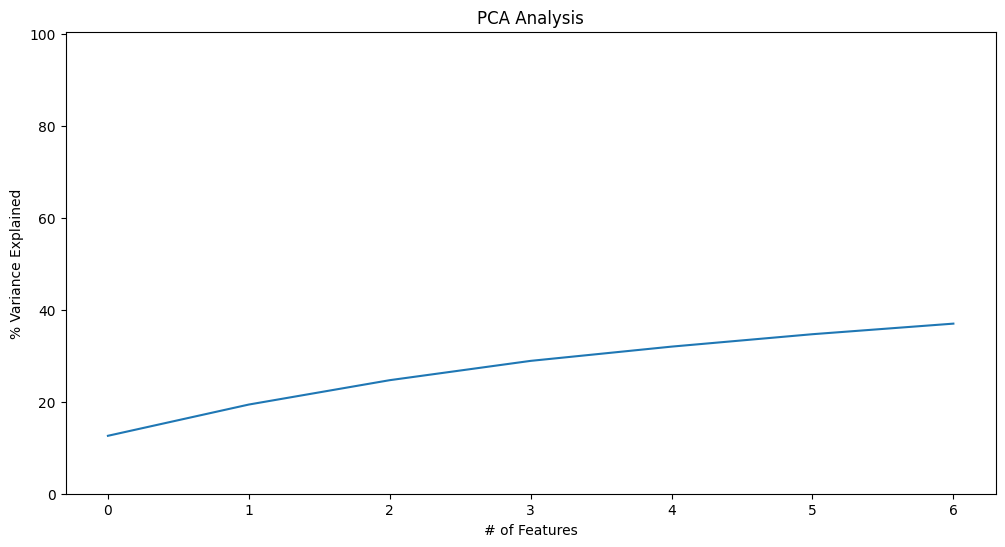

In [3]:
# PCA Graph 
EDA.create_PCA(minmax_data)

#### The data on 2 dimensions

Explained variance ratio for each component: [0.12570507 0.06839946]


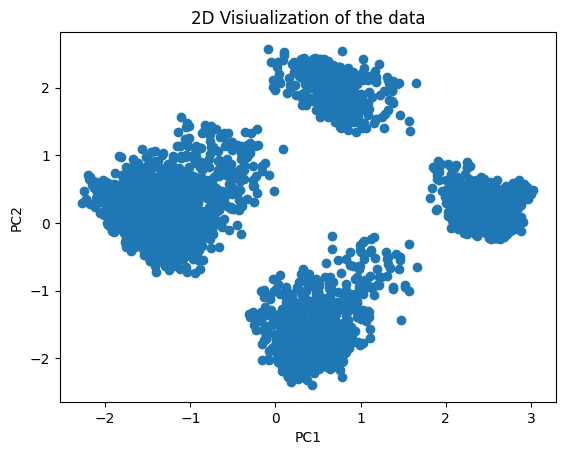

In [4]:
# Create a PCA On 2 components. 
X_2reduced = dbscan.create_pca(minmax_data, 2)

# The Data on 2D
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', title='2D Visiualization of the data')

#### The data on 3 dimensions

Explained variance ratio for each component: [0.12570507 0.06839946 0.0525458 ]


c:\Users\User\Clustering\Clustering-Analysis\models\../src/utils\EDA.py:128: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap=cmap)


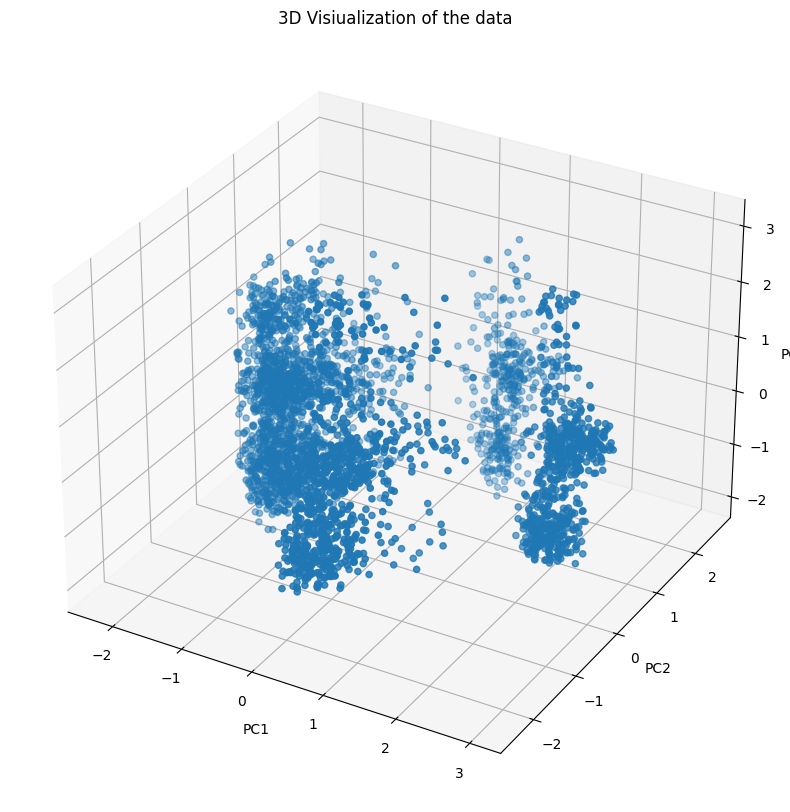

In [5]:
# Create a PCA On 3 components. 
X_3reduced = dbscan.create_pca(minmax_data, 3)

# Data on 3D
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="3D Visiualization of the data")

## DBSCAN With 231 Dimensions 
### Hyperparameters tuning

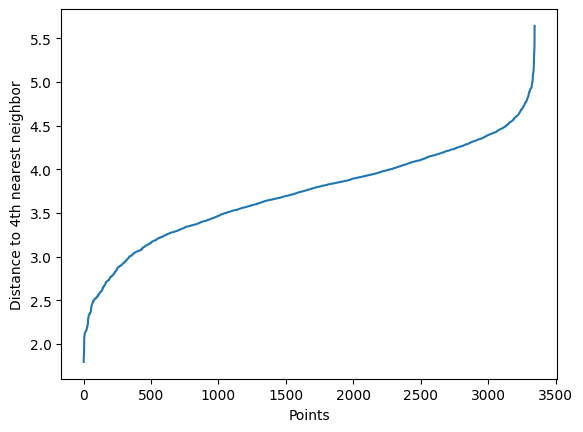

In [6]:
# Use K distance graph to determine the eps value. 
dbscan.get_kdistances(minmax_data, 4)

Based on the graph, I will choose eps = [3.5, 4, 4.5, 5]<br>
Based on our dimensions, I will choose minPts = [4, 6, 115, 231, 462] 

In [7]:
D231_results = dbscan.range_hyperparameters(minmax_data, [3.5, 4, 4.5, 5], [4, 6, 115, 231, 462])
D231_results 

eps minPts  silhouette_score n_clusters
0  3.5      4         -0.096150          7
1  3.5      6         -0.082772          4
2  4.0    115         -0.021915          3

It seems that dbscan did a bad job clustering with the 231 dimesnions, we've got negative silhouette scores <br>

Number of Clusters =  4


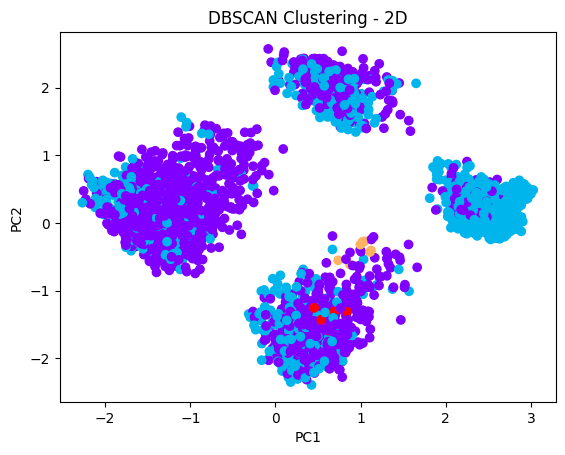

In [8]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(minmax_data, 3.5, 6)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  7


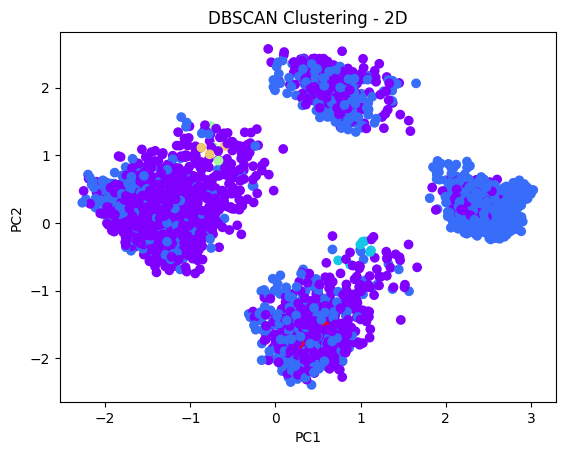

In [9]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(minmax_data, 3.5, 4)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  3


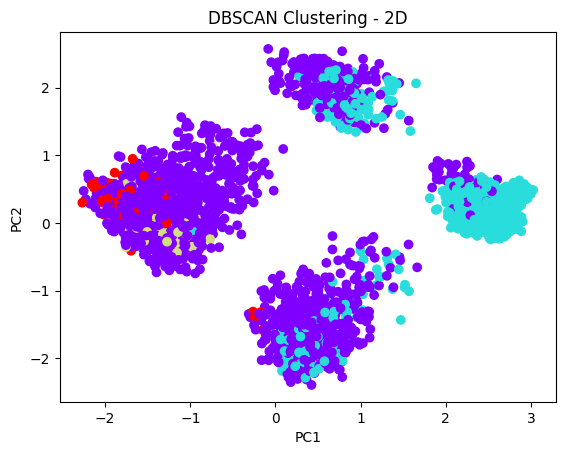

In [10]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(minmax_data, 4, 115)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')


Its obvious that dbscan didn't cluster the results very well because from the visiualization of the data it seems that we have 4 clusters, but there are more close clusters within the same one. <br> lets plot it on 3 dimensions

Number of Clusters =  4


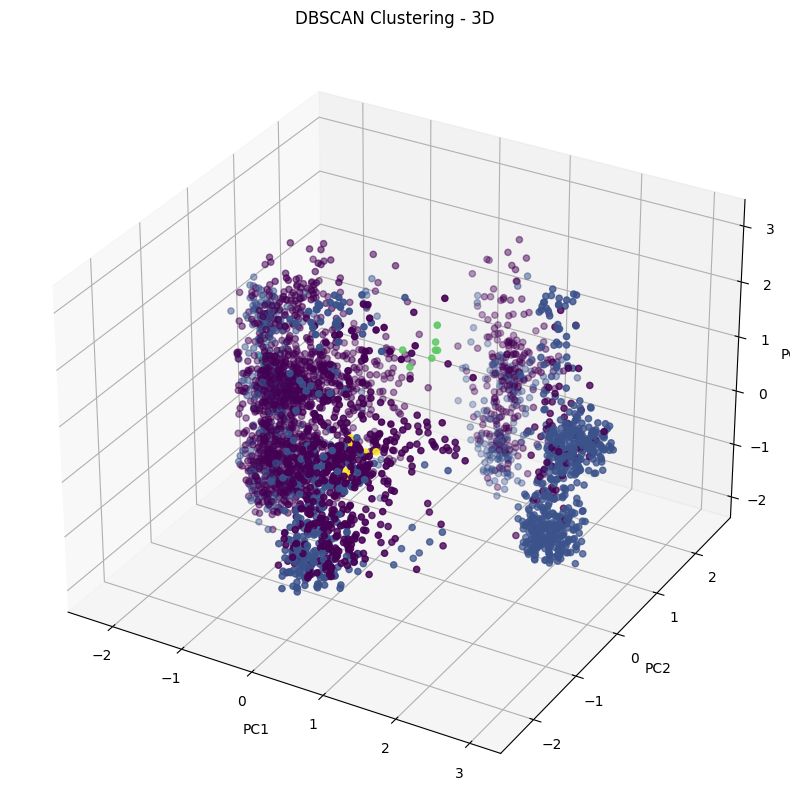

In [11]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(minmax_data, 3.5, 6)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

Number of Clusters =  7


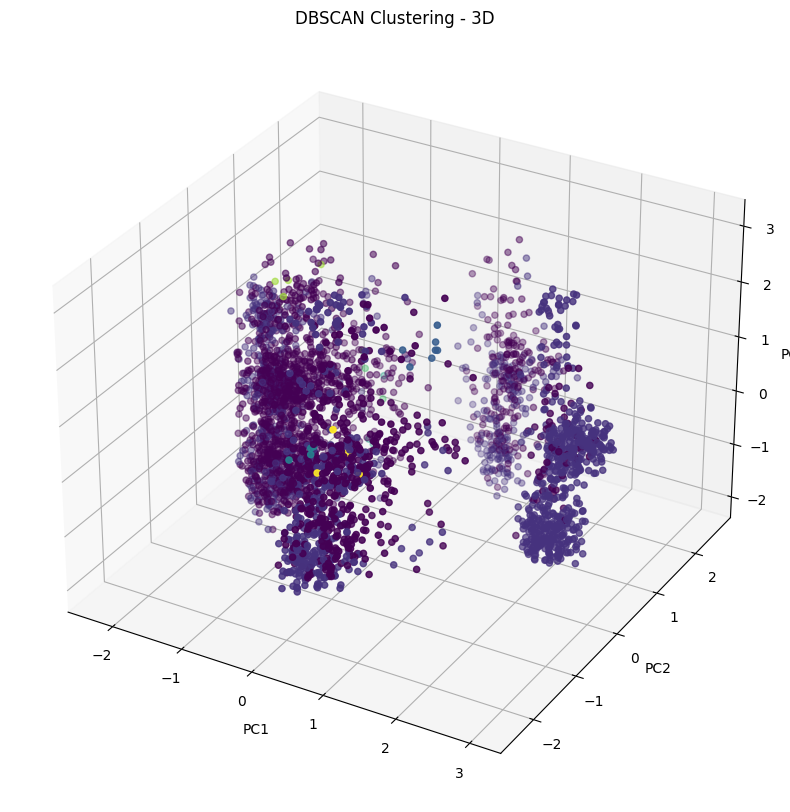

In [12]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(minmax_data, 3.5, 4)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

Number of Clusters =  3


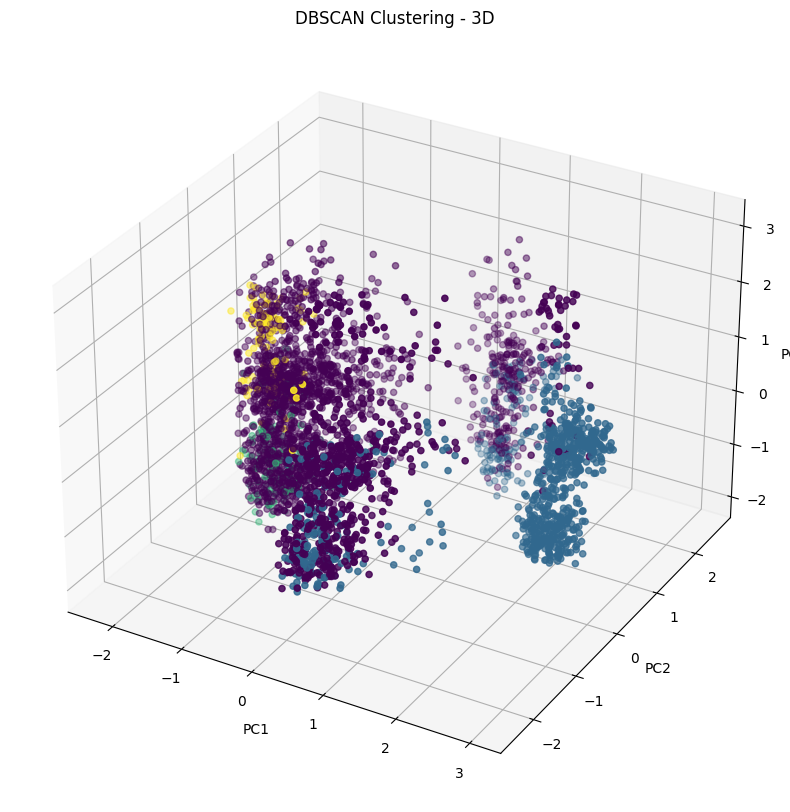

In [13]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(minmax_data, 4, 115)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

DBSCAN didn't cluster the data well with 231 Dimesnions.

## DBSCAN With 2 Dimensions 

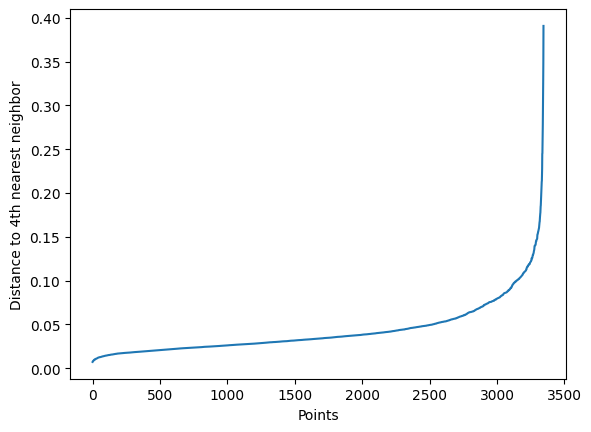

In [14]:
# Use K distance graph to determine the eps value. 
dbscan.get_kdistances(X_2reduced,4)

### Hyperparameters:
I will try these values for eps =  [0.05, 0.08, 0.1, 0.15], minPts = [2, 4, 6, 8, 10, 12]

In [15]:
D2_results = dbscan.range_hyperparameters(X_2reduced, [0.05, 0.08, 0.1, 0.15], [2, 4, 6, 8, 10, 12])
D2_results

eps minPts  silhouette_score n_clusters
0   0.05      2         -0.267943        166
1   0.05      4         -0.267530         55
2   0.05      6         -0.293330         38
3   0.05      8         -0.344630         38
4   0.05     10         -0.383837         29
5   0.05     12         -0.475760         24
6   0.08      2          0.000538         68
7   0.08      4          0.149187         28
8   0.08      6          0.209471         12
9   0.08      8          0.141636          9
10  0.08     10          0.179500          8
11  0.08     12          0.134927          8
12  0.10      2          0.032202         35
13  0.10      4          0.245921         16
14  0.10      6          0.314569         12
15  0.10      8          0.360966          8
16  0.10     10          0.541849          5
17  0.10     12          0.548311          5
18  0.15      2          0.525667          7
19  0.15      4          0.535888          6
20  0.15      6          0.645834          6
21  0.15      8          0.602596          6
22  0.15     10          0.569080          6
23  0.15     12          0.536201          6

note that eps = 0.15 generally produced the highest sillhouttee scores and most of them resulted in 6 clusters<br> Lets plot top scores on 2d and 3d. 

Number of Clusters =  6


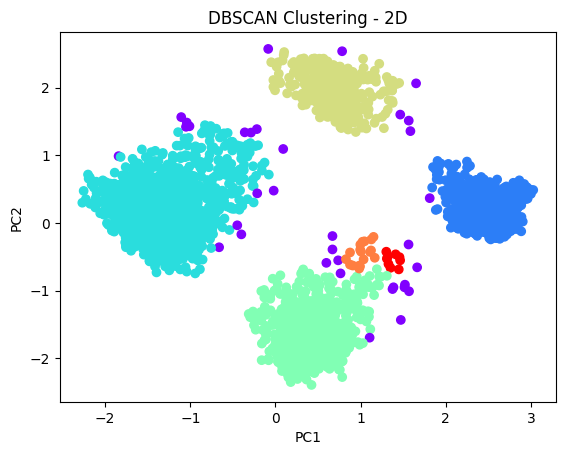

In [16]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(X_2reduced, 0.15, 6)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  6


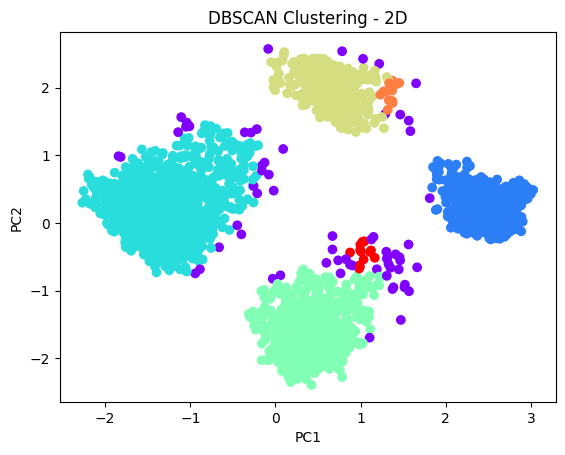

In [17]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(X_2reduced, 0.15, 8)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  6


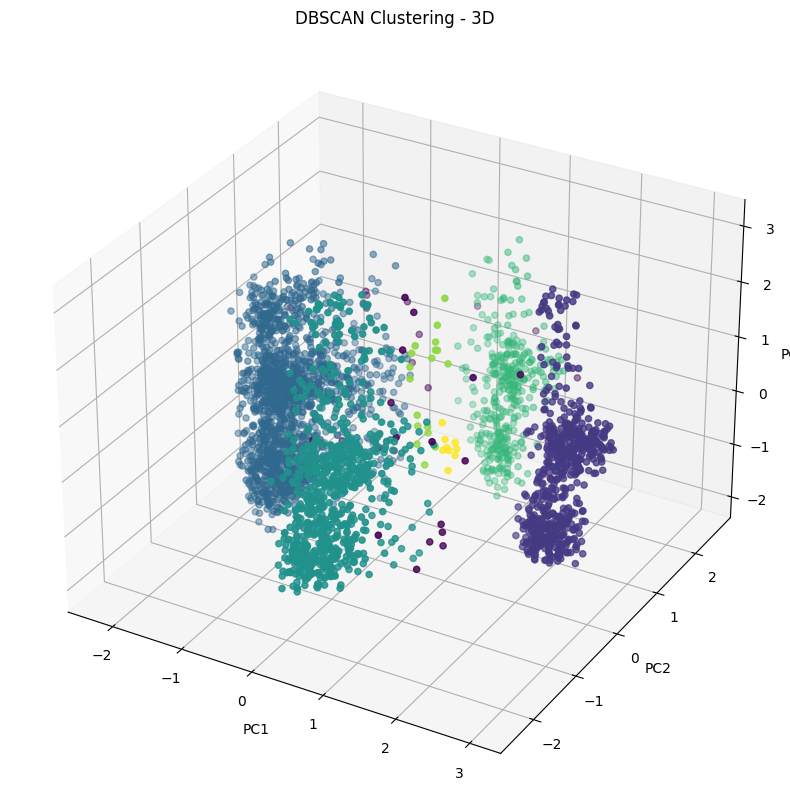

In [18]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(X_2reduced, 0.15, 6)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

Number of Clusters =  6


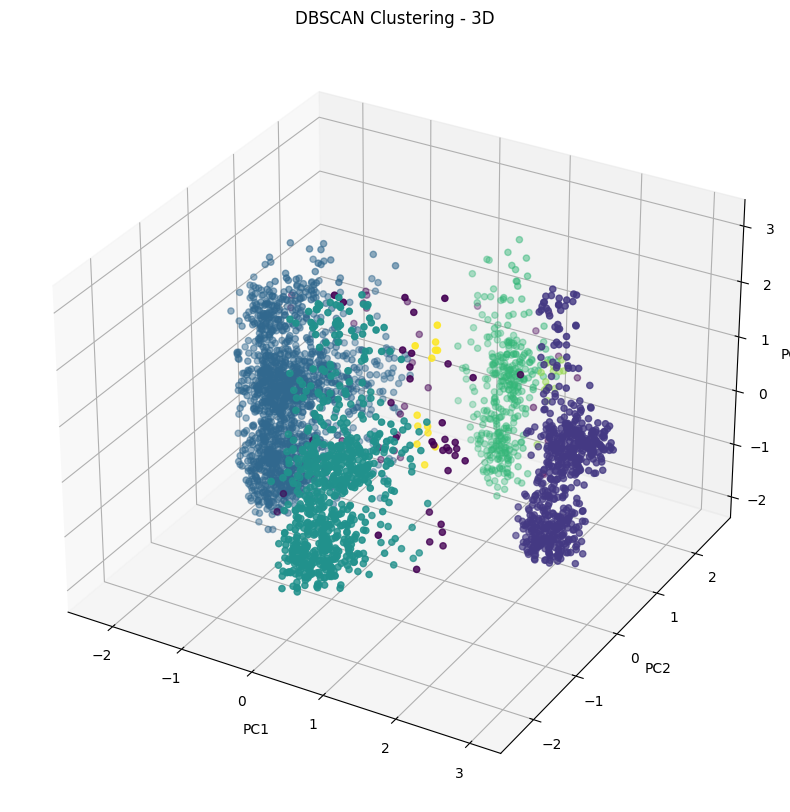

In [19]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(X_2reduced, 0.15, 8)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

DBSCAN on 2D did a very good job clustering the data. <br>
scores are close to 1 

## DBSCAN With 3 Dimensions 

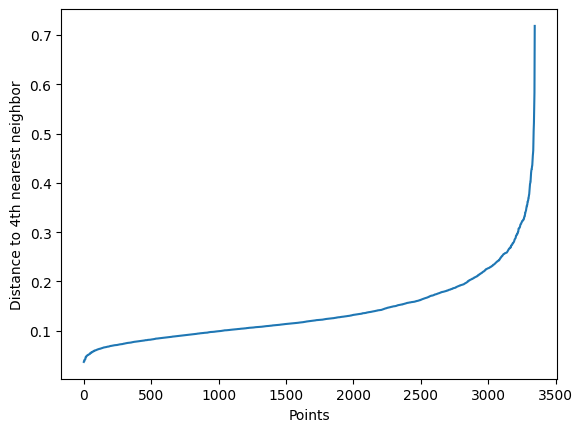

In [20]:
# Use K distance graph to determine the eps value. 
dbscan.get_kdistances(X_3reduced, 4)

### Hyperparameters
eps =  [.15, .2, .25, .3, .35], minPts = [3, 6, 9, 12]

In [21]:
D3_results = dbscan.range_hyperparameters(X_3reduced, [.15, .2, .25, .3, .35], [3, 6, 9, 12])
D3_results

eps minPts  silhouette_score n_clusters
0   0.15      3         -0.376290         62
1   0.15      6          0.001738         15
2   0.15      9         -0.011363         14
3   0.15     12         -0.356642         18
4   0.20      3         -0.107282         38
5   0.20      6          0.086900         12
6   0.20      9          0.238029          9
7   0.20     12          0.344787          5
8   0.25      3          0.028090         21
9   0.25      6          0.373735          9
10  0.25      9          0.213004          9
11  0.25     12          0.452479          5
12  0.30      3          0.350852         11
13  0.30      6          0.290531          9
14  0.30      9          0.425150          7
15  0.30     12          0.443017          7
16  0.35      3          0.389114          6
17  0.35      6          0.347102          7
18  0.35      9          0.488780          6
19  0.35     12          0.428171          8

highest sillhouttee scores were from different eps values ranges from 0.25 to 0.35, they also resulted on clusters on range 5 to 7<br> Lets plot top scores on 2D and 3D.

Number of Clusters =  6


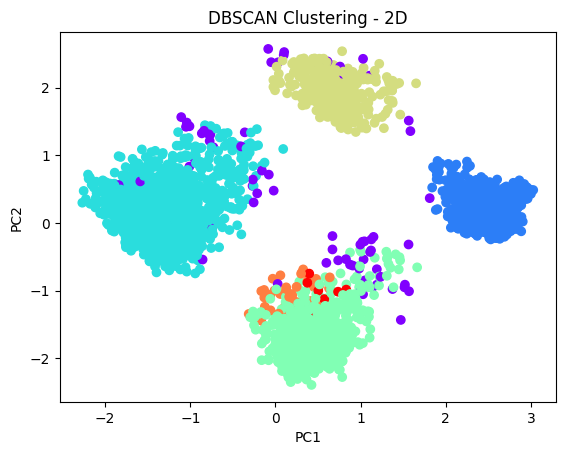

In [22]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(X_3reduced, .35, 9)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  5


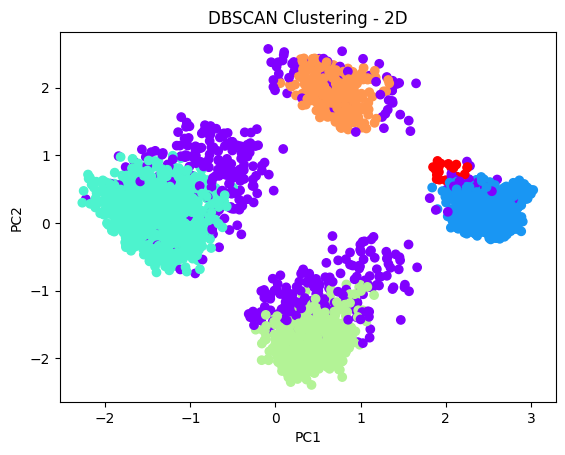

In [23]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(X_3reduced, .25, 12)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  7


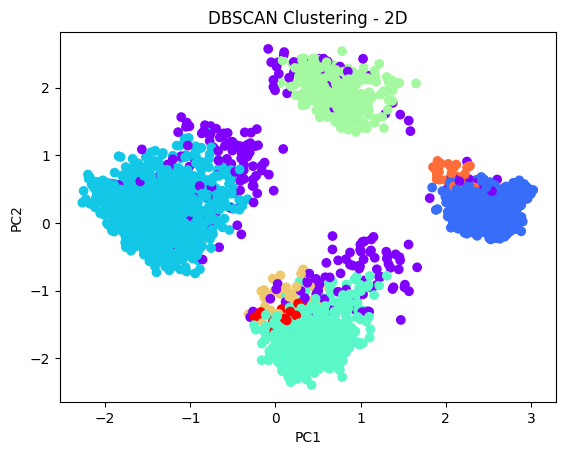

In [24]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(X_3reduced, .3, 12)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  6


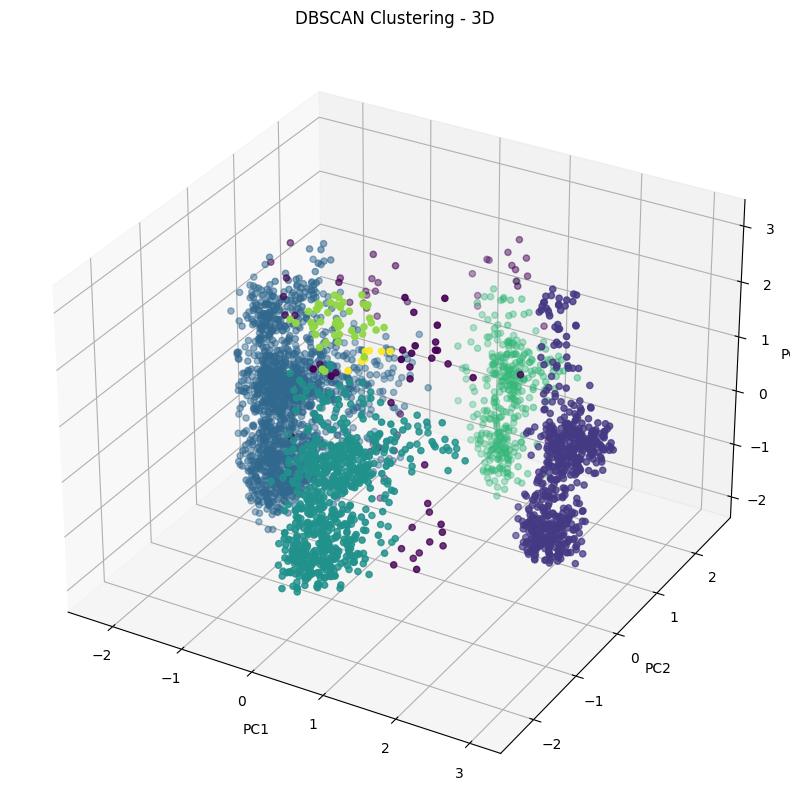

In [25]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(X_3reduced, .35, 9)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

Number of Clusters =  5


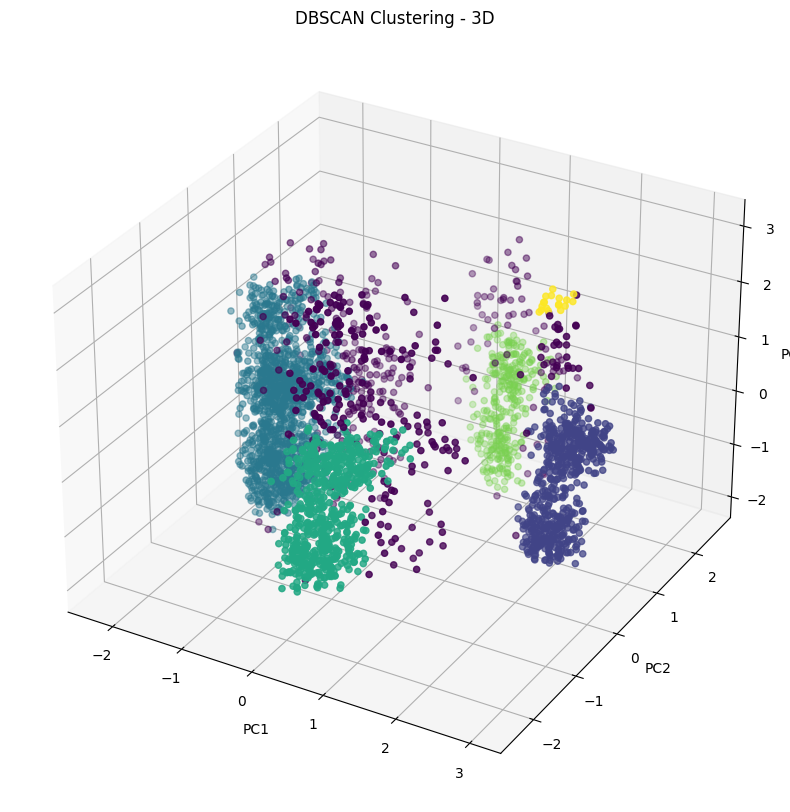

In [26]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(X_3reduced, .25, 12)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

Number of Clusters =  7


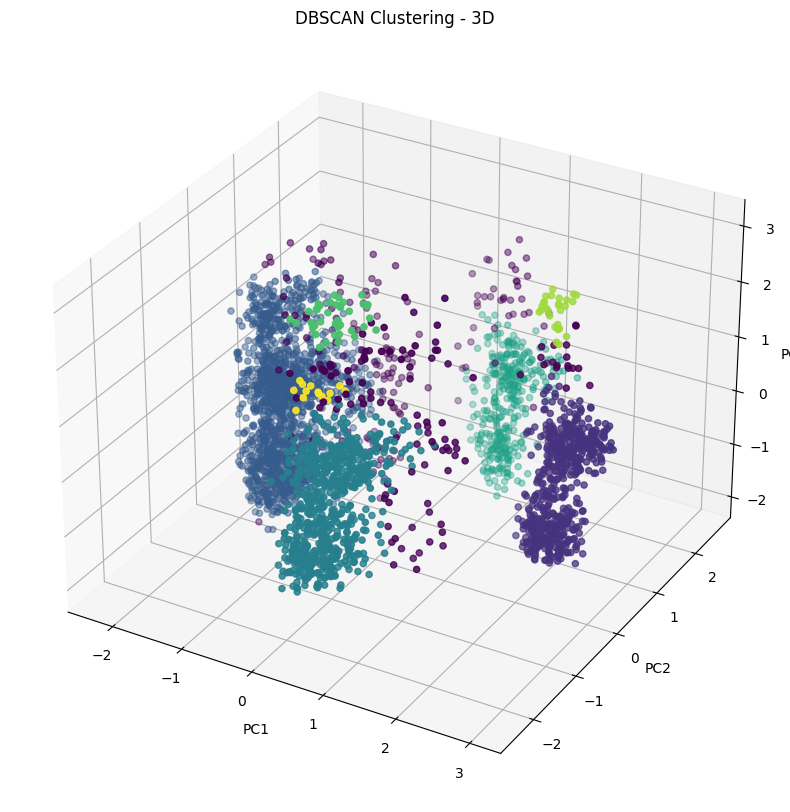

In [27]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(X_3reduced, .3, 12)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

### Comparing the results from all models on Minmax data

In [28]:
minmax_results = pd.DataFrame()

minmax_results = pd.concat([D231_results, D2_results, D3_results],axis=0)
minmax_results

eps minPts  silhouette_score n_clusters
0   3.50      4         -0.096150          7
1   3.50      6         -0.082772          4
2   4.00    115         -0.021915          3
0   0.05      2         -0.267943        166
1   0.05      4         -0.267530         55
2   0.05      6         -0.293330         38
3   0.05      8         -0.344630         38
4   0.05     10         -0.383837         29
5   0.05     12         -0.475760         24
6   0.08      2          0.000538         68
7   0.08      4          0.149187         28
8   0.08      6          0.209471         12
9   0.08      8          0.141636          9
10  0.08     10          0.179500          8
11  0.08     12          0.134927          8
12  0.10      2          0.032202         35
13  0.10      4          0.245921         16
14  0.10      6          0.314569         12
15  0.10      8          0.360966          8
16  0.10     10          0.541849          5
17  0.10     12          0.548311          5
18  0.15      2          0.525667          7
19  0.15      4          0.535888          6
20  0.15      6          0.645834          6
21  0.15      8          0.602596          6
22  0.15     10          0.569080          6
23  0.15     12          0.536201          6
0   0.15      3         -0.376290         62
1   0.15      6          0.001738         15
2   0.15      9         -0.011363         14
3   0.15     12         -0.356642         18
4   0.20      3         -0.107282         38
5   0.20      6          0.086900         12
6   0.20      9          0.238029          9
7   0.20     12          0.344787          5
8   0.25      3          0.028090         21
9   0.25      6          0.373735          9
10  0.25      9          0.213004          9
11  0.25     12          0.452479          5
12  0.30      3          0.350852         11
13  0.30      6          0.290531          9
14  0.30      9          0.425150          7
15  0.30     12          0.443017          7
16  0.35      3          0.389114          6
17  0.35      6          0.347102          7
18  0.35      9          0.488780          6
19  0.35     12          0.428171          8

## Reading Standard Scaled Data

In [29]:
# Reading data 
standard_data = pd.read_csv('../data/processed/data_scaled_standard.csv')

# Print the shape of data
standard_data.shape

(3346, 231)

### Visiualizing the data 
To visiualiza data we have to perform dimensionality reduction, to determine the number of components we'll use this PCA Graph that plots number of components and varience. 
#### PCA Graph

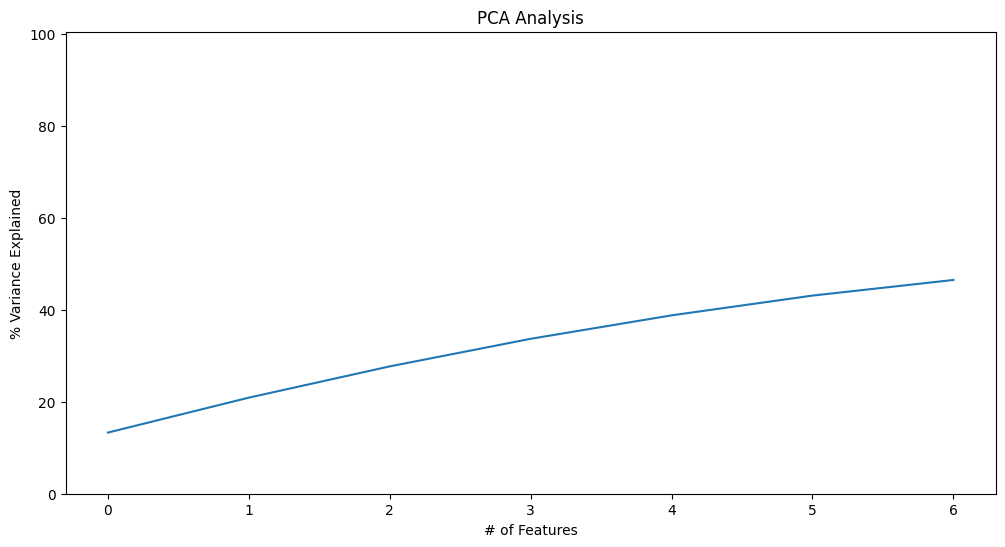

In [30]:
# PCA Graph 
EDA.create_PCA(standard_data)

#### The data on 2 dimensions

Explained variance ratio for each component: [0.13291958 0.07575221]


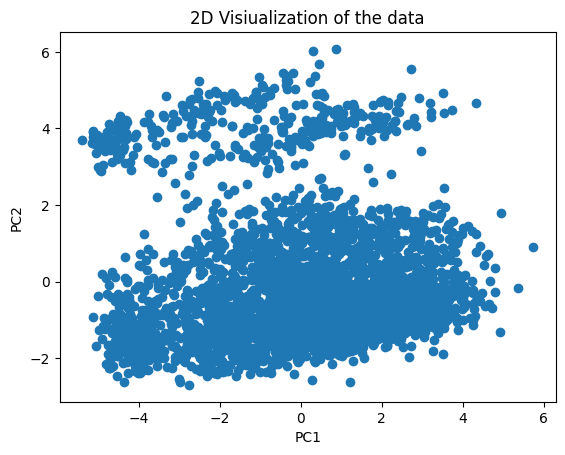

In [31]:
# Create a PCA On 2 components. 
X_2reduced = dbscan.create_pca(standard_data, 2)

# The Data on 2D
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', title='2D Visiualization of the data')

#### The data on 3 dimensions

Explained variance ratio for each component: [0.13291958 0.07575221 0.06823918]


c:\Users\User\Clustering\Clustering-Analysis\models\../src/utils\EDA.py:128: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap=cmap)


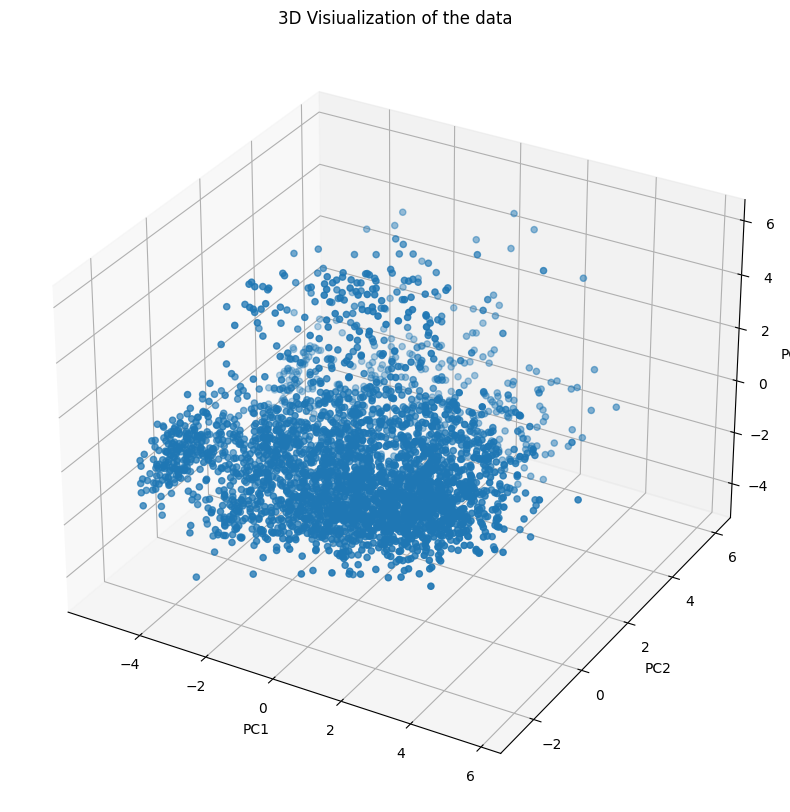

In [32]:
# Create a PCA On 3 components. 
X_3reduced = dbscan.create_pca(standard_data, 3)

# Data on 3D
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="3D Visiualization of the data")

## DBSCAN With 231 Dimensions 
### Hyperparameters tuning: 

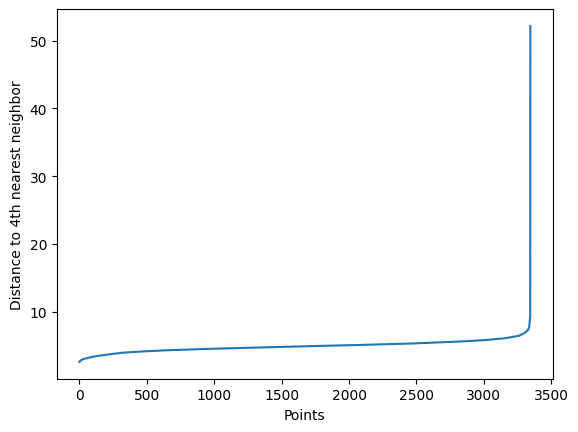

In [33]:
# Use K distance graph to determine the eps value. 
dbscan.get_kdistances(standard_data, 4)

Based on the graph, I will choose these values for eps = [6, 6.5, 7, 7.5, 8, 8.5] <br>
Based on our dimensions, I will choose minPts =  [2, 3, 4, 6, 115, 200, 231, 462]

In [34]:
D231_results = dbscan.range_hyperparameters(standard_data, [6, 6.5, 7, 7.5, 8, 8.5], [2, 3, 4, 6, 115, 200, 231, 462])
D231_results 

eps minPts  silhouette_score n_clusters
0    6      2          0.130167          4
1  6.5      2          0.210236          2
2  6.5      3          0.210236          2
3  7.5      2          0.534094          2

these few results produced generally good scores but relativly low number of clusters.<br> lets plot top scores on 2d and 3d

Number of Clusters =  2


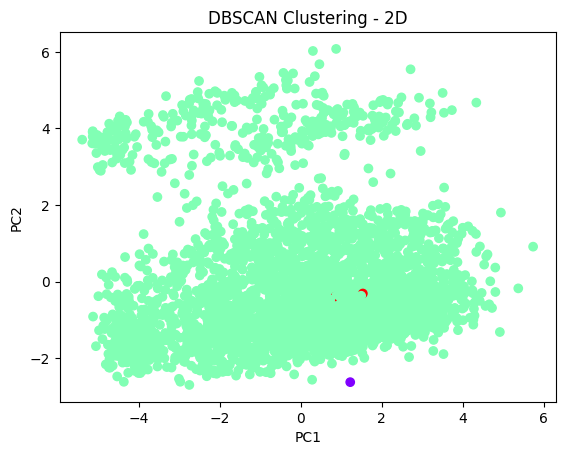

In [35]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(standard_data, 7.5, 2)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  2


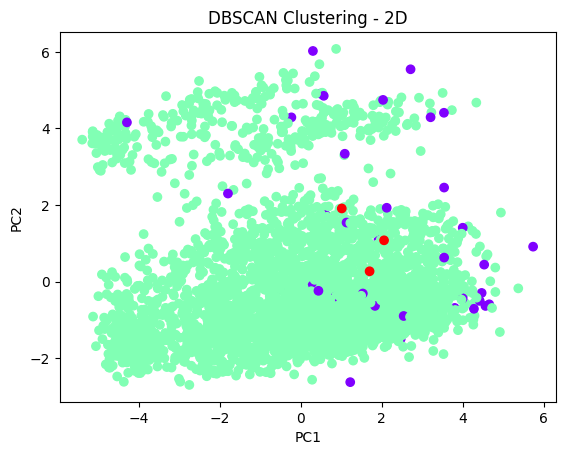

In [36]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(standard_data, 6.5, 3)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  2


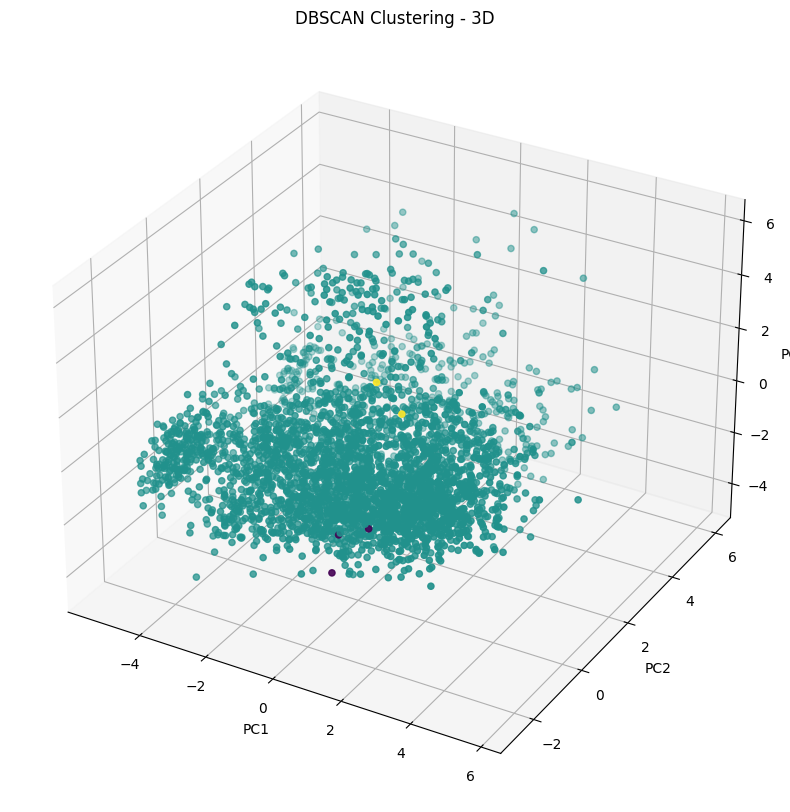

In [37]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(standard_data, 7.5, 2)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

Number of Clusters =  1


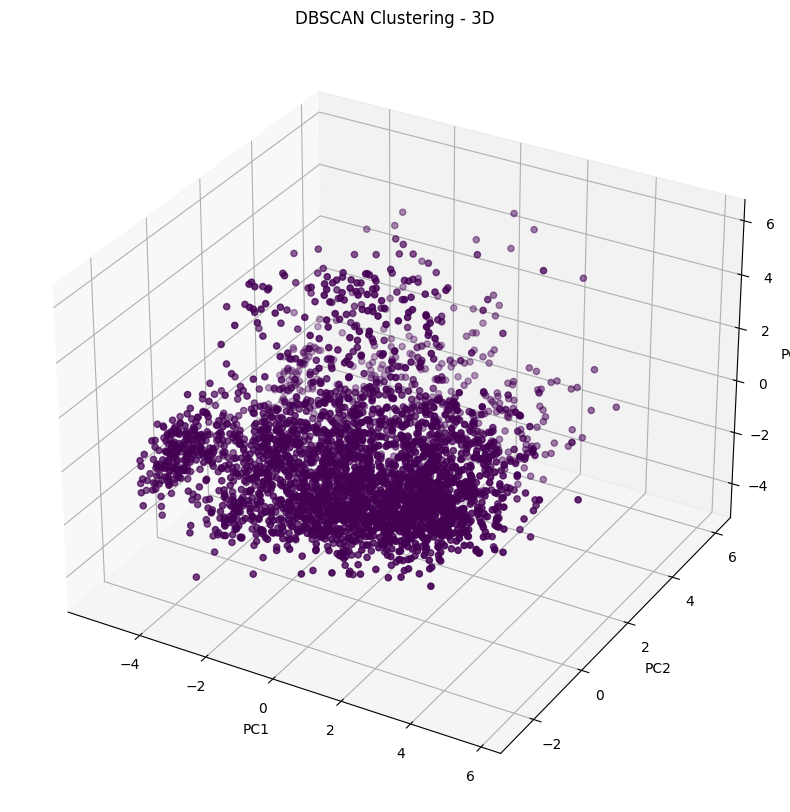

In [38]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(minmax_data, 6.5, 3)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

Even though the results produced very good scores, but it did a bad job clustering data. 

## DBSCAN With 2 Dimensions 

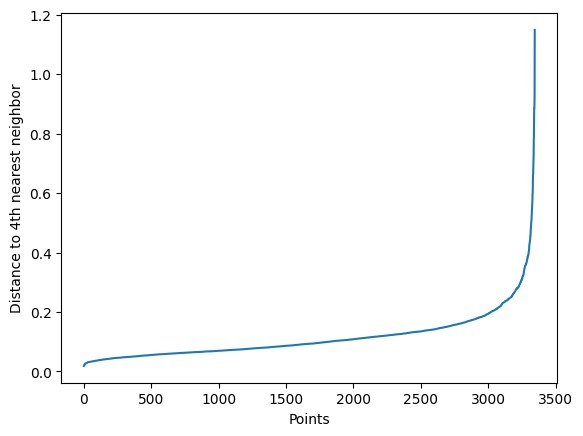

In [39]:
# Use K distance graph to determine the eps value. 
dbscan.get_kdistances(X_2reduced,4)

#### Hyperparameters
eps =  [0.2, 0.25, 0.3, 0.35, 0.4], minPts = [4, 6, 8, 10]

In [40]:
D2_results = dbscan.range_hyperparameters(X_2reduced, [0.2, 0.25, 0.3, 0.35, 0.4], [4, 6, 8, 10])
D2_results

eps minPts  silhouette_score n_clusters
0   0.20      4         -0.211435         25
1   0.20      6         -0.218207         21
2   0.20      8         -0.284755         18
3   0.20     10         -0.181143          8
4   0.25      4         -0.020877         15
5   0.25      6          0.023238         13
6   0.25      8         -0.162324         14
7   0.25     10          0.006409         11
8   0.30      4          0.129573          8
9   0.30      6          0.298346          8
10  0.30      8          0.288538          9
11  0.30     10          0.281529          8
12  0.35      4          0.304943          5
13  0.35      6          0.326232          4
14  0.35      8          0.349648          5
15  0.35     10          0.346233          5
16  0.40      4          0.186474          5
17  0.40      6          0.136207          4
18  0.40      8          0.364999          4
19  0.40     10          0.353057          5

note that highest scores comes from eps = 0.4 or 0.35 and most of them resulted in 6 clusters<br>  Lets plot top scores on 2d and 3d.

Number of Clusters =  4


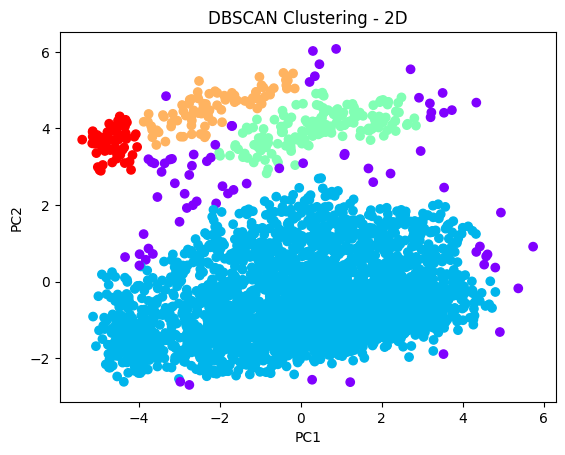

In [41]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(X_2reduced, 0.4, 8)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  5


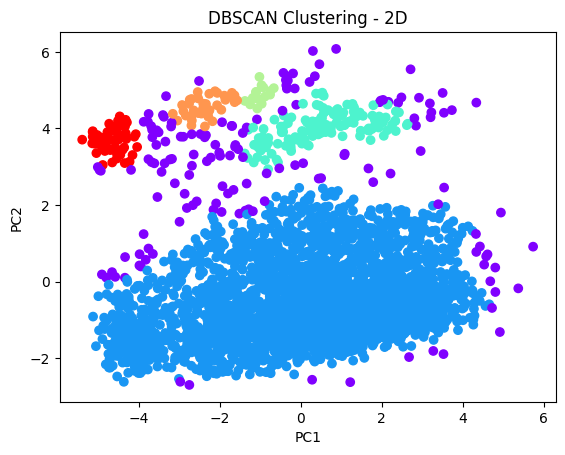

In [42]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(X_2reduced, 0.35, 10)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  4


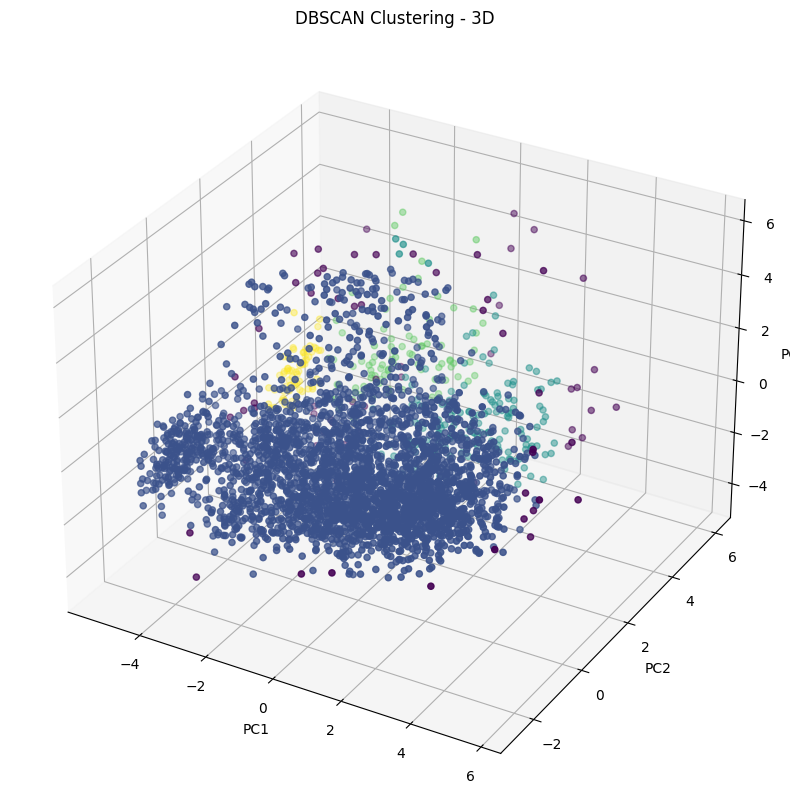

In [43]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(X_2reduced, 0.4, 8)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

Number of Clusters =  5


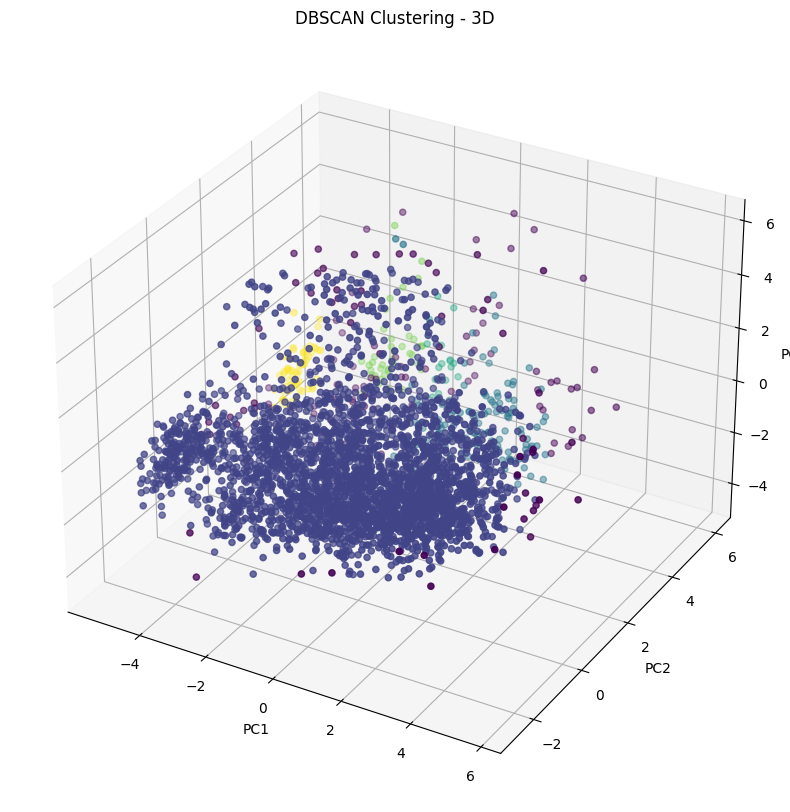

In [44]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(X_2reduced, 0.35, 10)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

## DBSCAN With 3 Dimensions 

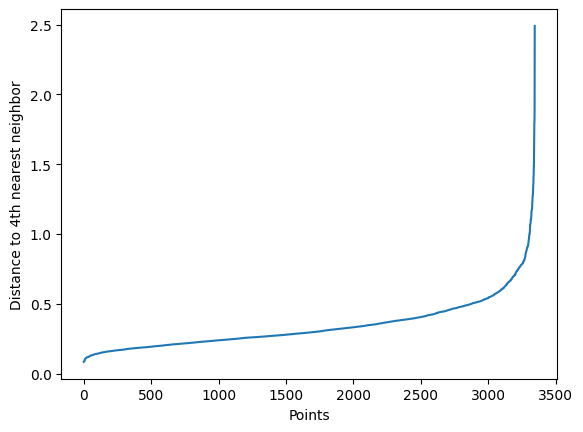

In [45]:
# Use K distance graph to determine the eps value. 
dbscan.get_kdistances(X_3reduced, 4)

#### Hyperparameters
eps =  [.25, .5, .75, 1], minPts = [6, 9, 12, 15]

In [46]:
D3_results = dbscan.range_hyperparameters(X_3reduced, [.25, .5, .75, 1], [6, 9, 12, 15])
D3_results

eps minPts  silhouette_score n_clusters
0   0.25      6         -0.510564         53
1   0.25      9         -0.452713         17
2   0.25     12         -0.398366          8
3   0.50      6          0.025041         11
4   0.50      9         -0.216150         12
5   0.50     12         -0.276130         11
6   0.50     15         -0.066159          5
7   0.75      6          0.287535          5
8   0.75      9          0.336993          4
9   0.75     12          0.299986          5
10  0.75     15          0.271704          6
11  1.00      6          0.389862          2
12  1.00      9          0.343929          3
13  1.00     12          0.377532          2
14  1.00     15          0.375892          2

note that highes scores came from values of eps = 1 , 0.75 and they produced 2-6 clusters <br>  Lets plot top scores on 2d and 3d

Number of Clusters =  2


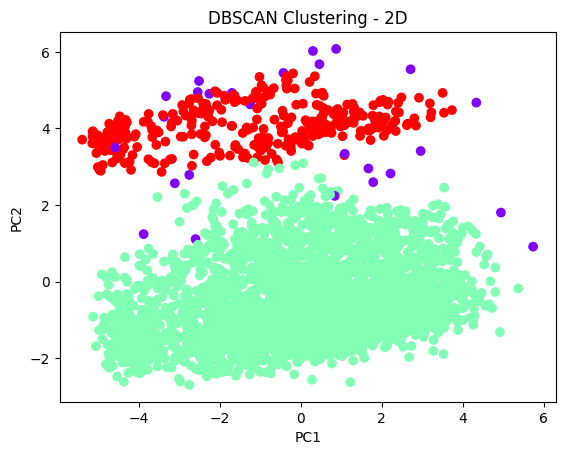

In [47]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(X_3reduced, 1, 6)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  4


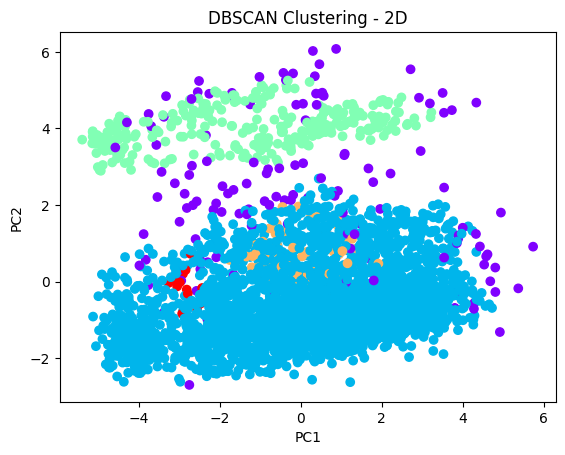

In [48]:
# Visiualize on 2D
clusters = dbscan.perform_dbscan(X_3reduced, 0.75, 9)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=clusters, title='DBSCAN Clustering - 2D')

Number of Clusters =  2


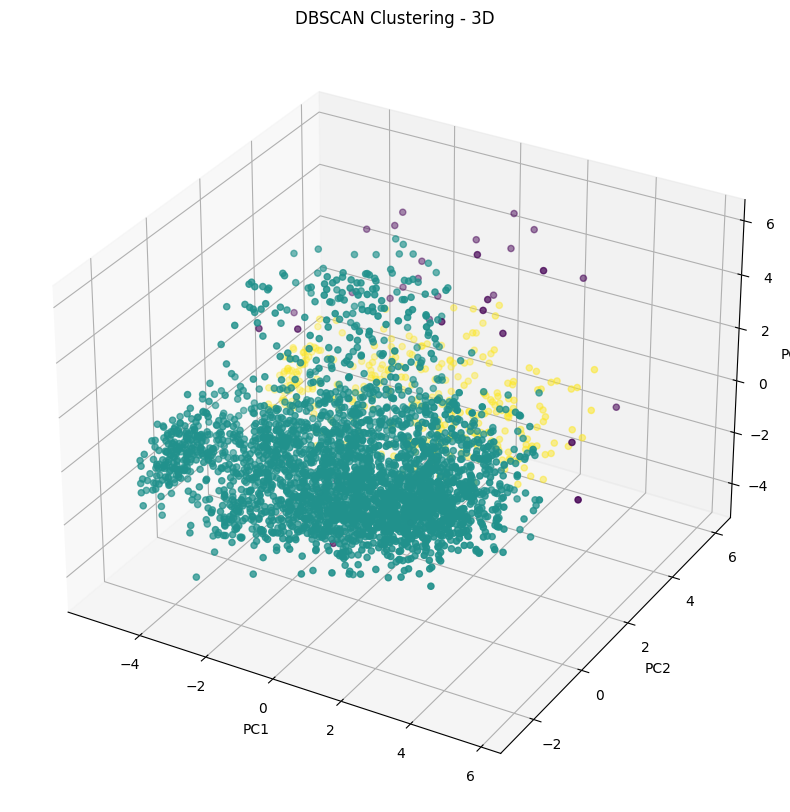

In [49]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(X_3reduced, 1, 6)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

Number of Clusters =  5


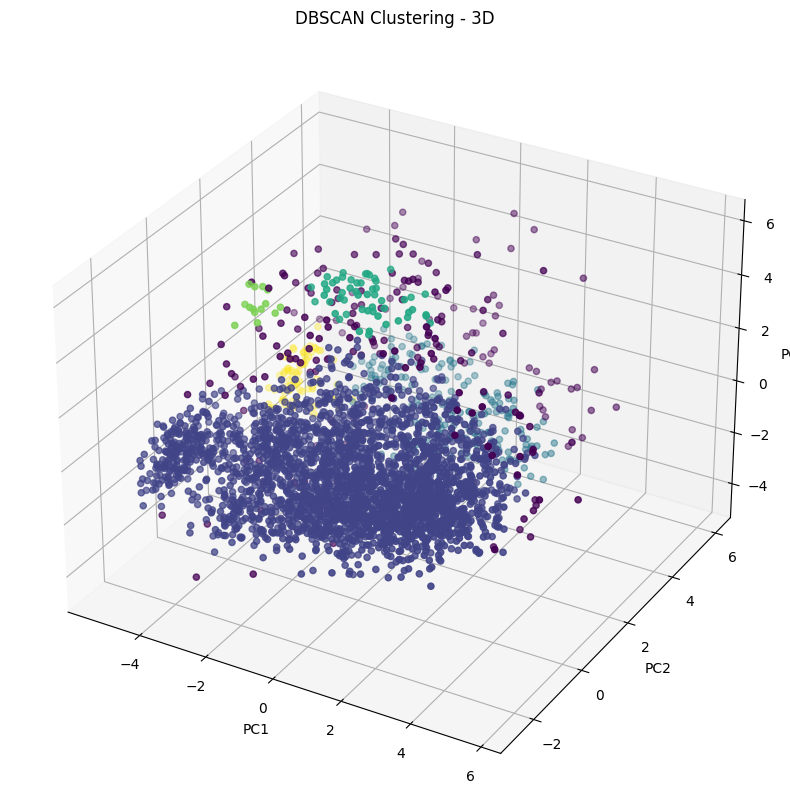

In [50]:
# Visiualize on 3D
clusters = dbscan.perform_dbscan(X_3reduced, .75, 12)

# Print the number of clusters
print("Number of Clusters = ",len(set(clusters)) - (1 if -1 in clusters else 0))

# Plot results
EDA.create_3d_scatter_plot(X_3reduced, xlabel="PC1", ylabel="PC2", zlabel="PC3", title="DBSCAN Clustering - 3D", labels=clusters)

### Comparing the results from all models on Minmax data

In [51]:
standard_results= pd.DataFrame()

standard_results = pd.concat([D231_results, D2_results, D3_results],axis=0)


In [52]:
standard_results

eps minPts  silhouette_score n_clusters
0      6      2          0.130167          4
1    6.5      2          0.210236          2
2    6.5      3          0.210236          2
3    7.5      2          0.534094          2
0    0.2      4         -0.211435         25
1    0.2      6         -0.218207         21
2    0.2      8         -0.284755         18
3    0.2     10         -0.181143          8
4   0.25      4         -0.020877         15
5   0.25      6          0.023238         13
6   0.25      8         -0.162324         14
7   0.25     10          0.006409         11
8    0.3      4          0.129573          8
9    0.3      6          0.298346          8
10   0.3      8          0.288538          9
11   0.3     10          0.281529          8
12  0.35      4          0.304943          5
13  0.35      6          0.326232          4
14  0.35      8          0.349648          5
15  0.35     10          0.346233          5
16   0.4      4          0.186474          5
17   0.4      6          0.136207          4
18   0.4      8          0.364999          4
19   0.4     10          0.353057          5
0   0.25      6         -0.510564         53
1   0.25      9         -0.452713         17
2   0.25     12         -0.398366          8
3    0.5      6          0.025041         11
4    0.5      9         -0.216150         12
5    0.5     12         -0.276130         11
6    0.5     15         -0.066159          5
7   0.75      6          0.287535          5
8   0.75      9          0.336993          4
9   0.75     12          0.299986          5
10  0.75     15          0.271704          6
11   1.0      6          0.389862          2
12   1.0      9          0.343929          3
13   1.0     12          0.377532          2
14   1.0     15          0.375892          2

## Conclusions
Nominated best model for MinMax


Explained variance ratio for each component: [0.12570507 0.06839946]
Number of Clusters =  6


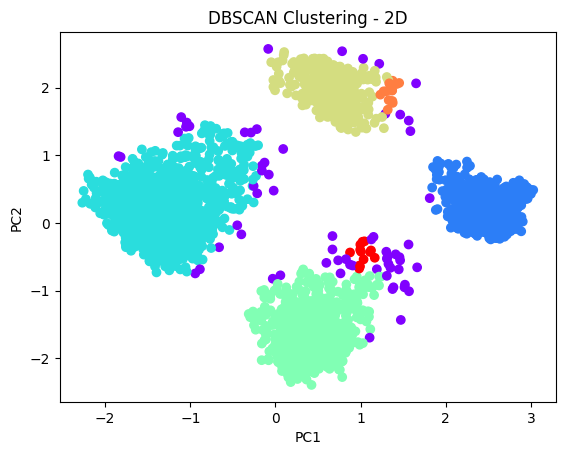

In [53]:
mmX_2reduced = dbscan.create_pca(minmax_data, 2)

# Visiualize on 2D
mmclusters = dbscan.perform_dbscan(mmX_2reduced, 0.15, 8)

# Print the number of clusters
print("Number of Clusters = ",len(set(mmclusters)) - (1 if -1 in mmclusters else 0))

# Plot results
EDA.create_scatterplot(mmX_2reduced[:, 0], mmX_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=mmclusters, title='DBSCAN Clustering - 2D')

Explained variance ratio for each component: [0.13291958 0.07575221 0.06823918]
Number of Clusters =  2


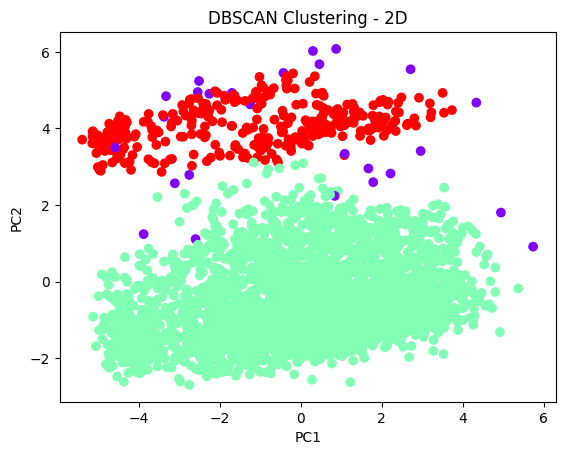

In [54]:
ssX_3reduced = dbscan.create_pca(standard_data, 3)

# Visiualize on 2D
ssclusters = dbscan.perform_dbscan(ssX_3reduced, 1, 6)

# Print the number of clusters
print("Number of Clusters = ",len(set(ssclusters)) - (1 if -1 in ssclusters else 0))

# Plot results
EDA.create_scatterplot(X_2reduced[:, 0], X_2reduced[:, 1], xlabel='PC1', ylabel='PC2', colors=ssclusters, title='DBSCAN Clustering - 2D')

Append model labels to each dataset.

In [55]:
standard_data["dbscan"] = ssclusters

In [56]:
minmax_data["dbscan"] = mmclusters

In [67]:
minmax_data

num_trips  num_walk_trips  num_transit_trips  num_bike_trips  \
0      0.129213        0.010753           0.052632        0.305556   
1      0.084270        0.021505           0.017544        0.000000   
2      0.168539        0.236559           0.157895        0.000000   
3      0.269663        0.247312           0.228070        0.000000   
4      0.252809        0.139785           0.105263        0.333333   
...         ...             ...                ...             ...   
3341   0.011236        0.000000           0.035088        0.000000   
3342   0.000000        0.000000           0.000000        0.000000   
3343   0.016854        0.000000           0.000000        0.000000   
3344   0.022472        0.000000           0.035088        0.000000   
3345   0.011236        0.000000           0.035088        0.000000   

      num_taxi_trips  num_tnc_trips  num_complete_weekend_days  \
0                0.0       0.000000                        1.0   
1                0.0       0.000000                        1.0   
2                0.0       0.000000                        1.0   
3                0.0       0.000000                        1.0   
4                0.0       0.111111                        1.0   
...              ...            ...                        ...   
3341             0.0       0.000000                        0.0   
3342             0.0       0.000000                        0.0   
3343             0.0       0.000000                        0.0   
3344             0.0       0.055556                        0.5   
3345             0.0       0.000000                        0.0   

      num_complete_weekdays  made_trips       age  ...  \
0                       1.0         1.0  0.142857  ...   
1                       1.0         1.0  0.142857  ...   
2                       1.0         1.0  0.428571  ...   
3                       0.4         1.0  0.285714  ...   
4                       1.0         1.0  0.142857  ...   
...                     ...         ...       ...  ...   
3341                    0.2         1.0  0.285714  ...   
3342                    0.2         0.0  0.571429  ...   
3343                    0.2         1.0  0.428571  ...   
3344                    0.0         1.0  0.000000  ...   
3345                    0.2         1.0  0.428571  ...   

      work_cms_zone_Outer Brooklyn  work_cms_zone_Outer Queens  \
0                              0.0                         0.0   
1                              0.0                         0.0   
2                              0.0                         0.0   
3                              0.0                         0.0   
4                              0.0                         0.0   
...                            ...                         ...   
3341                           0.0                         0.0   
3342                           0.0                         0.0   
3343                           0.0                         0.0   
3344                           1.0                         0.0   
3345                           0.0                         0.0   

      work_cms_zone_Southern Bronx  work_cms_zone_Staten Island  \
0                              0.0                          0.0   
1                              0.0                          0.0   
2                              0.0                          0.0   
3                              0.0                          0.0   
4                              0.0                          0.0   
...                            ...                          ...   
3341                           0.0                          0.0   
3342                           0.0                          0.0   
3343                           0.0                          0.0   
3344                           0.0                          0.0   
3345                           0.0                          1.0   

      work_cms_zone_Upper Manhattan  first_travel_date_day  \
0              

In [57]:
data = pd.read_csv("../data/processed/Citywide_Survey_Processed_Scaled.csv")

In [58]:
data.head()
data.drop("Unnamed: 0", axis=1, inplace=True)


In [59]:
data.drop(3345, axis = 0, inplace=True)

In [60]:
data

num_trips  num_walk_trips  num_transit_trips  num_bike_trips  \
0     -0.116026       -0.744828          -0.369827        4.940805   
1     -0.481370       -0.662113          -0.631415       -0.195801   
2      0.203650        0.992181           0.414937       -0.195801   
3      1.025674        1.074896           0.938113       -0.195801   
4      0.888670        0.247749           0.022555        5.407769   
...         ...             ...                ...             ...   
3340  -1.029387       -0.827543          -0.369827       -0.195801   
3341  -1.075055       -0.827543          -0.500621       -0.195801   
3342  -1.166391       -0.827543          -0.762210       -0.195801   
3343  -1.029387       -0.827543          -0.762210       -0.195801   
3344  -0.983719       -0.827543          -0.500621       -0.195801   

      num_taxi_trips  num_tnc_trips  num_complete_weekend_days  \
0          -0.067175      -0.317366                   0.868765   
1          -0.067175      -0.317366                   0.868765   
2          -0.067175      -0.317366                   0.868765   
3          -0.067175      -0.317366                   0.868765   
4          -0.067175       1.376266                   0.868765   
...              ...            ...                        ...   
3340       -0.067175      -0.317366                  -1.501303   
3341       -0.067175      -0.317366                  -1.501303   
3342       -0.067175      -0.317366                  -1.501303   
3343       -0.067175      -0.317366                  -1.501303   
3344       -0.067175       0.529450                  -0.316269   

      num_complete_weekdays  worker  license  ...  ethnicity_1  ethnicity_2  \
0                  1.040283       0        1  ...          0.0          0.0   
1                  1.040283       1        0  ...          1.0          0.0   
2                  1.040283       1        0  ...          1.0          0.0   
3                 -0.574432       1        1  ...          1.0          0.0   
4                  1.040283       1        1  ...          0.0          0.0   
...                     ...     ...      ...  ...          ...          ...   
3340              -1.112670       0        0  ...          0.0          0.0   
3341              -1.112670       1        0  ...          1.0          0.0   
3342              -1.112670       1        1  ...          1.0          0.0   
3343              -1.112670       1        1  ...          1.0          0.0   
3344              -1.650908       1        1  ...          1.0          0.0   

      ethnicity_3  ethnicity_4  ethnicity_997  ethnicity_999  \
0             0.0          0.0            1.0            0.0   
1             0.0          0.0            0.0            0.0   
2             0.0          0.0            0.0            0.0   
3             0.0          0.0            0.0            0.0   
4             0.0          0.0            1.0            0.0   
...           ...          ...            ...            ...   
3340          0.0          0.0            0.0            1.0   
3341          0.0          0.0            0.0            0.0   
3342          0.0          0.0            0.0            0.0   
3343          0.0          0.0            0.0            0.0   
3344          0.0          0.0            0.0            0.0   

      first_travel_date_day  first_travel_date_month  last_travel_date_day  \
0                  1.379855                 0.440621              1.964126   
1                  1.943425                -2.269523             -1.288022   
2                 -0.648999                 0.440621             -0.287361   
3                  0.478142                 0.440621              0.963465   
4                 -0.423571                 0.440621             -0.037196   
...                     ...                      ...                   ...   
3340               2.056140                -2.269523              1.964126   
3341               0.140000   

In [61]:
data = data.append(dict(zip(data.columns, mmclusters)),ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_34288\383362742.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dict(zip(data.columns, mmclusters)),ignore_index=True)


In [62]:
data.shape 

(3346, 283)

In [63]:
len(mmclusters)

3346

In [64]:
data["dbscan"] = mmclusters

In [65]:
data

num_trips  num_walk_trips  num_transit_trips  num_bike_trips  \
0     -0.116026       -0.744828          -0.369827        4.940805   
1     -0.481370       -0.662113          -0.631415       -0.195801   
2      0.203650        0.992181           0.414937       -0.195801   
3      1.025674        1.074896           0.938113       -0.195801   
4      0.888670        0.247749           0.022555        5.407769   
...         ...             ...                ...             ...   
3341  -1.075055       -0.827543          -0.500621       -0.195801   
3342  -1.166391       -0.827543          -0.762210       -0.195801   
3343  -1.029387       -0.827543          -0.762210       -0.195801   
3344  -0.983719       -0.827543          -0.500621       -0.195801   
3345   0.000000        1.000000           2.000000        2.000000   

      num_taxi_trips  num_tnc_trips  num_complete_weekend_days  \
0          -0.067175      -0.317366                   0.868765   
1          -0.067175      -0.317366                   0.868765   
2          -0.067175      -0.317366                   0.868765   
3          -0.067175      -0.317366                   0.868765   
4          -0.067175       1.376266                   0.868765   
...              ...            ...                        ...   
3341       -0.067175      -0.317366                  -1.501303   
3342       -0.067175      -0.317366                  -1.501303   
3343       -0.067175      -0.317366                  -1.501303   
3344       -0.067175       0.529450                  -0.316269   
3345        1.000000       1.000000                   2.000000   

      num_complete_weekdays  worker  license  ...  ethnicity_2  ethnicity_3  \
0                  1.040283       0        1  ...          0.0          0.0   
1                  1.040283       1        0  ...          0.0          0.0   
2                  1.040283       1        0  ...          0.0          0.0   
3                 -0.574432       1        1  ...          0.0          0.0   
4                  1.040283       1        1  ...          0.0          0.0   
...                     ...     ...      ...  ...          ...          ...   
3341              -1.112670       1        0  ...          0.0          0.0   
3342              -1.112670       1        1  ...          0.0          0.0   
3343              -1.112670       1        1  ...          0.0          0.0   
3344              -1.650908       1        1  ...          0.0          0.0   
3345               1.000000       0        2  ...          1.0          1.0   

      ethnicity_4  ethnicity_997  ethnicity_999  first_travel_date_day  \
0             0.0            1.0            0.0               1.379855   
1             0.0            0.0            0.0               1.943425   
2             0.0            0.0            0.0              -0.648999   
3             0.0            0.0            0.0               0.478142   
4             0.0            1.0            0.0              -0.423571   
...           ...            ...            ...                    ...   
3341          0.0            0.0            0.0               0.140000   
3342          0.0            0.0            0.0               2.056140   
3343          0.0            0.0            0.0               1.379855   
3344          0.0            0.0            0.0               0.365428   
3345          1.0            2.0            1.0               3.000000   

      first_travel_date_month  last_travel_date_day  last_travel_date_month  \
0                    0.440621              1.964126                0.333555   
1                   -2.269523             -1.288022                0.333555   
2                    0.440621             -0.287361                0.333555   
3                    0.440621              0.963465                0.333555   
4                    0.440621             -0.037196                0.333555   
...                       ...                   ...         

In [66]:
data.to_csv("../data/processed/dbscan_data.csv")

In [68]:
minmax_data.to_csv("../data/processed/dbscan_minmaxdata.csv")